# Import

In [716]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import mytools as mt

In [717]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
tt = pd.concat([train, test])

In [920]:
train_original = pd.read_csv("train.csv")

# Describing the data

In [718]:
mt.glance(train)

SHAPE:
(891, 12)

DESCRIPTION:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

DESCRIPTION OF OBJECT DATA TYPES:
               

In [719]:
mt.glance(test)

SHAPE:
(418, 11)

DESCRIPTION:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

DESCRIPTION OF OBJECT DATA TYPES:
                    Name   Sex    Ticket            Cabin Embarked
count                418   418       418               91      418
unique               418     2       363               76        3
top     Kelly, Mr. Jam

# Imputing missing values

## Extraction and Clean-up

needs further clean-up, get dummies and other modifications

In [720]:
tt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Name

In [721]:
tt['Title']=tt.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())

#### Titles

In [722]:
tt.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [723]:
tt.groupby(['Title', 'Sex']).Survived.mean()

Title         Sex   
Capt          male      0.000000
Col           male      0.500000
Don           male      0.000000
Dona          female         NaN
Dr            female    1.000000
              male      0.333333
Jonkheer      male      0.000000
Lady          female    1.000000
Major         male      0.500000
Master        male      0.575000
Miss          female    0.697802
Mlle          female    1.000000
Mme           female    1.000000
Mr            male      0.156673
Mrs           female    0.792000
Ms            female    1.000000
Rev           male      0.000000
Sir           male      1.000000
the Countess  female    1.000000
Name: Survived, dtype: float64

Group the Officers together, leave Dr and Rev as they seem to have separate rates of survival.

In [724]:
newtitles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Nobility",
    "Don":        "Nobility",
    "Sir" :       "Nobility",
    "Dr":         "Dr",
    "Rev":        "Rev",
    "the Countess":"Nobility",
    "Dona":       "Nobility",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr":        "Mr",
    "Mrs":       "Mrs",
    "Miss":      "Miss",
    "Master":    "Master",
    "Lady":      "Nobility"
}

In [725]:
tt['Title'] = tt.Title.map(newtitles).copy()

In [726]:
tt.Title.value_counts()

Mr          757
Miss        262
Mrs         200
Master       61
Rev           8
Dr            8
Officer       7
Nobility      6
Name: Title, dtype: int64

In [727]:
tt = tt.drop('Name', axis=1)

In [728]:
tt = pd.get_dummies(tt, columns=['Title'], drop_first=True, prefix ='Title')

In [729]:
tt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobility,Title_Officer,Title_Rev
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0,0


### Ticket

In [730]:
tt['Dup_Ticket'] = tt.Ticket.duplicated()

In [731]:
(tt.query('Dup_Ticket == True and Survived == 0.0').shape[0]/891) * 100

12.008978675645341

Duplicate Ticket is not a good predictor of Survived, with both around 10% rate for Survived and Not Survived.

In [732]:
tt['Ticket_Length'] = tt.Ticket.apply(lambda x: len(x))

C:\Users\euana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ticket_Length'>

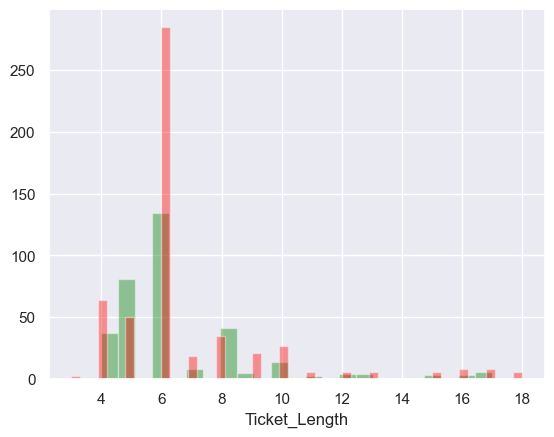

In [733]:
sns.distplot(tt[tt.Survived==1].Ticket_Length, color='green', kde=False)
sns.distplot(tt[tt.Survived==0].Ticket_Length, color='red', kde=False)

In [734]:
tt.iloc[0:891].corr()['Survived'].sort_values()

Title_Mr         -0.549199
Pclass           -0.338481
Age              -0.077221
Title_Rev        -0.064988
Ticket_Length    -0.055331
SibSp            -0.035322
PassengerId      -0.005007
Title_Officer     0.002496
Title_Nobility    0.033391
Parch             0.081629
Title_Master      0.085221
Dup_Ticket        0.121766
Fare              0.257307
Title_Miss        0.332795
Title_Mrs         0.344935
Survived          1.000000
Name: Survived, dtype: float64

In [735]:
tt = tt.drop('Ticket', axis=1).copy()

In [736]:
tt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Nobility', 'Title_Officer', 'Title_Rev',
       'Dup_Ticket', 'Ticket_Length'],
      dtype='object')

### Cabin

#### Duplicate Cabins

In [737]:
tt['Dup_Cabin'] = tt.Cabin.duplicated()

In [738]:
(tt.iloc[0:891].query('Dup_Cabin == True and Survived == 1').shape[0]/891) * 100

28.058361391694724

Duplicate Cabin is a good predictor of not surviving, with 55.33% in a duplicate cabin not surviving. 

In [739]:
tt.isna().sum()

PassengerId          0
Survived           418
Pclass               0
Sex                  0
Age                263
SibSp                0
Parch                0
Fare                 1
Cabin             1014
Embarked             2
Title_Master         0
Title_Miss           0
Title_Mr             0
Title_Mrs            0
Title_Nobility       0
Title_Officer        0
Title_Rev            0
Dup_Ticket           0
Ticket_Length        0
Dup_Cabin            0
dtype: int64

#### Get cabin letter

In [740]:
temp = []

In [741]:
for x in tt.Cabin:
    if type(x) != float:
        temp.append(x[0])
    else:
        temp.append('None')

In [742]:
tt['Cabin_Letter'] = temp

In [743]:
tt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,Title_Miss,Title_Mr,Title_Mrs,Title_Nobility,Title_Officer,Title_Rev,Dup_Ticket,Ticket_Length,Dup_Cabin,Cabin_Letter
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,S,...,0,1,0,0,0,0,False,9,False,None
1,2,1.0,1,female,38.0,1,0,71.2833,C85,C,...,0,0,1,0,0,0,False,8,False,C
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,S,...,1,0,0,0,0,0,False,16,True,None
3,4,1.0,1,female,35.0,1,0,53.1000,C123,S,...,0,0,1,0,0,0,False,6,False,C
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,S,...,0,1,0,0,0,0,False,6,True,None


<AxesSubplot:xlabel='Cabin_Letter', ylabel='Survived'>

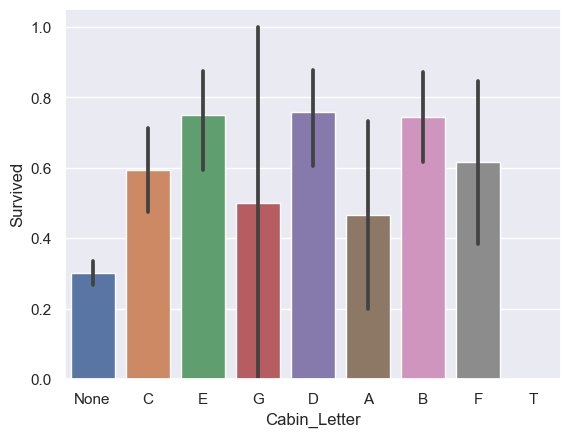

In [744]:
sns.barplot(data=tt, x="Cabin_Letter", y="Survived")

In [745]:
tt = tt.drop("Cabin", axis=1).copy()

In [746]:
tt = pd.get_dummies(tt, columns=['Cabin_Letter'], drop_first=True, prefix ='Letter_')

## Sex

In [747]:
tt['Male'] = pd.get_dummies(tt.Sex,drop_first=True)

In [748]:
tt = tt.drop('Sex', axis=1)

In [749]:
tt.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title_Master,Title_Miss,...,Dup_Cabin,Letter__B,Letter__C,Letter__D,Letter__E,Letter__F,Letter__G,Letter__None,Letter__T,Male
0,1,0.0,3,22.0,1,0,7.2500,S,0,0,...,False,0,0,0,0,0,0,1,0,1
1,2,1.0,1,38.0,1,0,71.2833,C,0,0,...,False,0,1,0,0,0,0,0,0,0
2,3,1.0,3,26.0,0,0,7.9250,S,0,1,...,True,0,0,0,0,0,0,1,0,0
3,4,1.0,1,35.0,1,0,53.1000,S,0,0,...,False,0,1,0,0,0,0,0,0,0
4,5,0.0,3,35.0,0,0,8.0500,S,0,0,...,True,0,0,0,0,0,0,1,0,1


### Embarked

In [750]:
tt = pd.get_dummies(tt, columns=['Embarked'], drop_first=True, prefix ='Embarked_')

In [751]:
tt.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,...,Letter__C,Letter__D,Letter__E,Letter__F,Letter__G,Letter__None,Letter__T,Male,Embarked__Q,Embarked__S
0,1,0.0,3,22.0,1,0,7.2500,0,0,1,...,0,0,0,0,0,1,0,1,0,1
1,2,1.0,1,38.0,1,0,71.2833,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,1.0,3,26.0,0,0,7.9250,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,4,1.0,1,35.0,1,0,53.1000,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0.0,3,35.0,0,0,8.0500,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [752]:
tt.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,...,Letter__C,Letter__D,Letter__E,Letter__F,Letter__G,Letter__None,Letter__T,Male,Embarked__Q,Embarked__S
413,1305,NaN,3,NaN,0,0,8.0500,0,0,1,...,0,0,0,0,0,1,0,1,0,1
414,1306,NaN,1,39.0,0,0,108.9000,0,0,0,...,1,0,0,0,0,0,0,0,0,0
415,1307,NaN,3,38.5,0,0,7.2500,0,0,1,...,0,0,0,0,0,1,0,1,0,1
416,1308,NaN,3,NaN,0,0,8.0500,0,0,1,...,0,0,0,0,0,1,0,1,0,1
417,1309,NaN,3,NaN,1,1,22.3583,1,0,0,...,0,0,0,0,0,1,0,1,0,0


## Using Miss Forest

In [753]:
tt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Nobility',
       'Title_Officer', 'Title_Rev', 'Dup_Ticket', 'Ticket_Length',
       'Dup_Cabin', 'Letter__B', 'Letter__C', 'Letter__D', 'Letter__E',
       'Letter__F', 'Letter__G', 'Letter__None', 'Letter__T', 'Male',
       'Embarked__Q', 'Embarked__S'],
      dtype='object')

#### Split into train and test

In [754]:
train = tt.iloc[0:891].copy()

In [755]:
test = tt.iloc[891:1309].copy()

In [758]:
imputation_train = train[[#'PassengerId', 
    'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Nobility', 'Title_Officer', 'Title_Rev', 'Dup_Ticket',
       'Ticket_Length', 'Dup_Cabin', 'Male', 'Letter__B', 'Letter__C',
       'Letter__D', 'Letter__E', 'Letter__F', 'Letter__G', 'Letter__None',
       'Letter__T', 'Embarked__Q', 'Embarked__S']].copy()

In [762]:
imputation_test = test[[#'PassengerId', #'Survived', 
    'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Nobility', 'Title_Officer', 'Title_Rev', 'Dup_Ticket',
       'Ticket_Length', 'Dup_Cabin', 'Male', 'Letter__B', 'Letter__C',
       'Letter__D', 'Letter__E', 'Letter__F', 'Letter__G', 'Letter__None',
       'Letter__T', 'Embarked__Q', 'Embarked__S']].copy()

#### Imputing train 

In [763]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [764]:
imputer = MissForest()
mf_train = imputer.fit_transform(imputation_train)
mf_train = pd.DataFrame(mf_train, columns = imputation_train.columns)

C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 0


C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 1


C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 2


C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 3


In [765]:
mf_train.isna().sum()

Survived          0
Pclass            0
Age               0
SibSp             0
Parch             0
Fare              0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_Nobility    0
Title_Officer     0
Title_Rev         0
Dup_Ticket        0
Ticket_Length     0
Dup_Cabin         0
Male              0
Letter__B         0
Letter__C         0
Letter__D         0
Letter__E         0
Letter__F         0
Letter__G         0
Letter__None      0
Letter__T         0
Embarked__Q       0
Embarked__S       0
dtype: int64

#### Imputing test

In [766]:
imputer = MissForest()
mf_test = imputer.fit_transform(imputation_test)
mf_test = pd.DataFrame(mf_test, columns = imputation_test.columns)

C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 0


C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 1


C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 2


C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\euana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 3


In [767]:
mf_test.isna().sum()

Pclass            0
Age               0
SibSp             0
Parch             0
Fare              0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_Nobility    0
Title_Officer     0
Title_Rev         0
Dup_Ticket        0
Ticket_Length     0
Dup_Cabin         0
Male              0
Letter__B         0
Letter__C         0
Letter__D         0
Letter__E         0
Letter__F         0
Letter__G         0
Letter__None      0
Letter__T         0
Embarked__Q       0
Embarked__S       0
dtype: int64

#### Re-joining train and test

In [768]:
mf_train['PassengerId'] = train['PassengerId']

In [769]:
mf_test['PassengerId'] = test['PassengerId']

# Exploring the relationship between Survived and other Features

In [788]:
survived = round((mf_train.query('Survived == 1').shape[0]/mf_train.shape[0])*100,1)

In [789]:
death = 100 - survived

In [791]:
print(f"{survived}% survived, and {death}% did not survive.")

38.4% survived, and 61.6% did not survive.


## Pclass

In [844]:
Pclass_totals = mf_train.Pclass.value_counts()

In [852]:
Pclass_totals

3.0    491
1.0    216
2.0    184
Name: Pclass, dtype: int64

In [845]:
Pclass_percentage = mf_train.Pclass.value_counts(normalize=True).round(2)

In [846]:
Pclass_totals

3.0    491
1.0    216
2.0    184
Name: Pclass, dtype: int64

In [847]:
Pclass_percentage

3.0    0.55
1.0    0.24
2.0    0.21
Name: Pclass, dtype: float64

In [831]:
Pclass_survived = train.groupby('Pclass').Survived.value_counts()

<AxesSubplot:xlabel='Survived'>

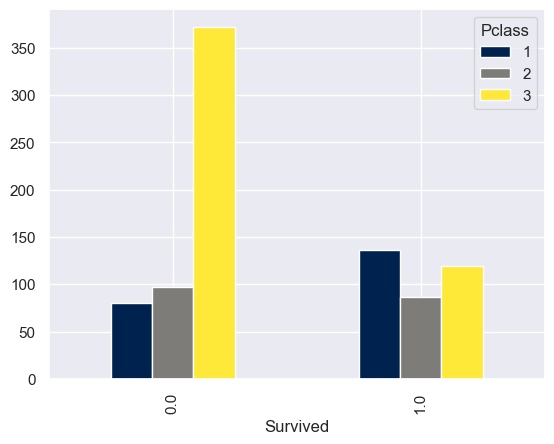

In [832]:
Pclass_survived.unstack(level=0).plot(kind='bar', subplots=False, colormap="cividis")

In [833]:
Pclass_survived_normalized = train.groupby('Pclass').Survived.value_counts(normalize=True)

<AxesSubplot:xlabel='Survived'>

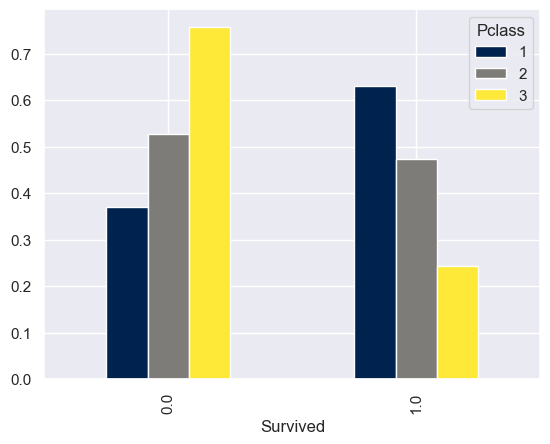

In [834]:
Pclass_survived_normalized.unstack(level=0).plot(kind='bar', subplots=False, colormap="cividis")

In [850]:
Pclass_survived_combined = pd.concat([Pclass_survived,
                                      Pclass_survived_normalized],
                                      axis=1,
                                      keys=('Proportion', 'Count', 'Percentage')).round(2)


In [851]:
Pclass_survived_combined

Proportion  Count
Pclass Survived                   
1      1.0              136   0.63
       0.0               80   0.37
2      0.0               97   0.53
       1.0               87   0.47
3      0.0              372   0.76
       1.0              119   0.24

In [803]:
Pclass_mean_survived = mf_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

In [800]:
Pclass_mean_survived

,Pclass,Survived
0,1.0,0.629630
1,2.0,0.472826
2,3.0,0.242363


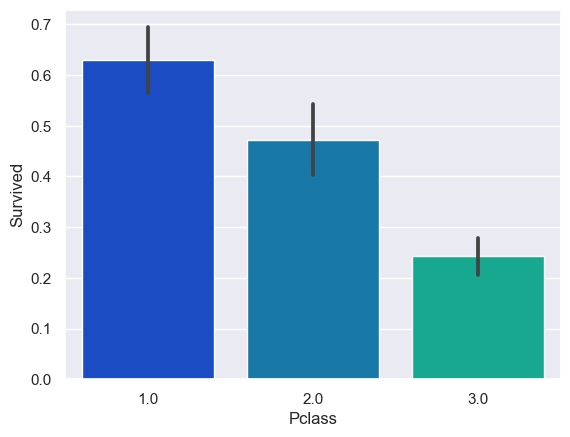

In [812]:
ax = sns.barplot(data=mf_train, x="Pclass", y="Survived", palette="winter")

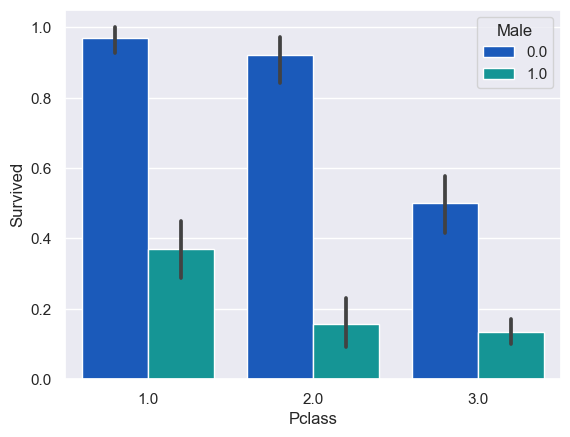

In [813]:
ax = sns.barplot(data=mf_train, x="Pclass", y="Survived", hue="Male", palette="winter")

NOTES: The lower Pclass number (higher class) the better the chance of survival. Pclass 3 accounts for 55% of all passengers in the mf_train dataset but has Survived at 24%, compared to Pclass 1 which accounts for 24.3% of all passenger with Survived at 62.96%. 

# Sex

In [872]:
Sex_totals = mf_train.Male.value_counts()

In [873]:
Sex_percentage = mf_train.Male.value_counts(normalize=True).round(2)

In [874]:
Sex_totals, Sex_percentage

(1.0    577
 0.0    314
 Name: Male, dtype: int64,
 1.0    0.65
 0.0    0.35
 Name: Male, dtype: float64)

In [859]:
Sex_survived = mf_train.groupby('Male').Survived.value_counts()

In [865]:
Sex_survived_normalized = mf_train.groupby('Male').Survived.value_counts(normalize=True).round(2)

In [866]:
Sex_survived, Sex_survived_normalized

(Male  Survived
 0.0   1.0         233
       0.0          81
 1.0   0.0         468
       1.0         109
 Name: Survived, dtype: int64,
 Male  Survived
 0.0   1.0         0.74
       0.0         0.26
 1.0   0.0         0.81
       1.0         0.19
 Name: Survived, dtype: float64)

<AxesSubplot:xlabel='Survived'>

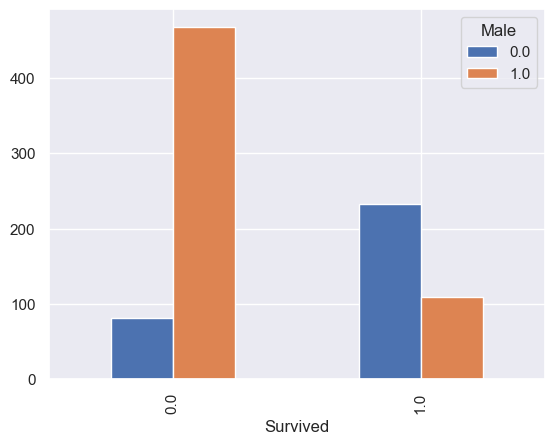

In [870]:
Sex_survived.unstack(level=0).plot(kind='bar', subplots=False)

<AxesSubplot:xlabel='Survived'>

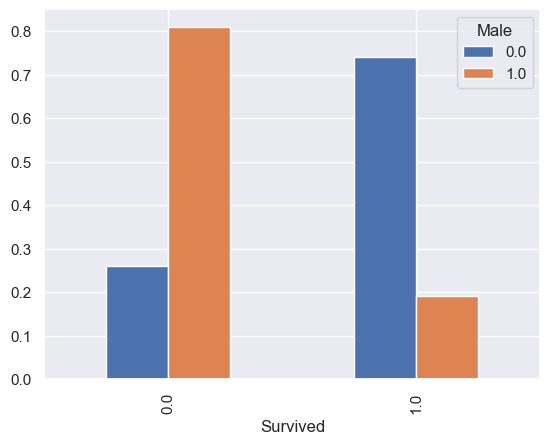

In [871]:
Sex_survived_normalized.unstack(level=0).plot(kind='bar', subplots=False)

In [868]:
Sex_survived_combined = pd.concat([Sex_survived,
                 Sex_survived_normalized],
                 axis=1,
                 keys=('Proportion', 'Count', 'Percentage')).round(2)


In [869]:
Sex_survived_combined

Proportion  Count
Male Survived                   
0.0  1.0              233   0.74
     0.0               81   0.26
1.0  0.0              468   0.81
     1.0              109   0.19

NOTES: Female has 74% survival rate, compared to Male 19%. Of the 891 passengers in our data, 65% were men and 35% were men.

## Age

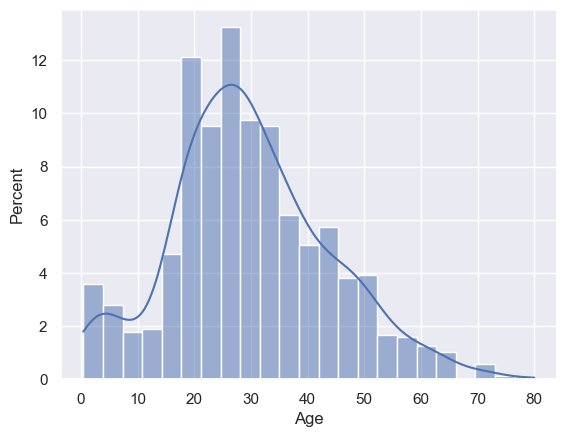

In [888]:
ax = sns.histplot(data=mf_train, x="Age", stat="percent", kde=True)

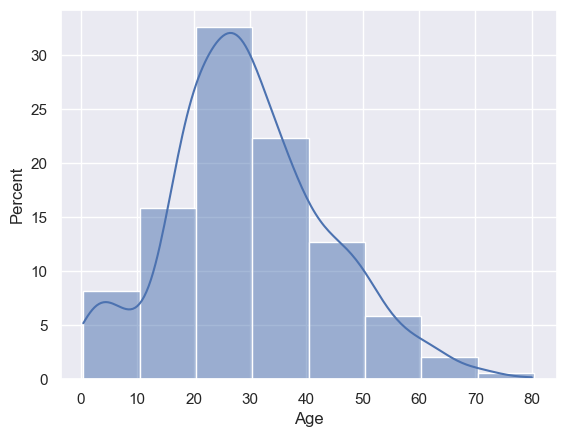

In [887]:
ax = sns.histplot(data=mf_train, x="Age", stat="percent", binwidth=10, kde=True)

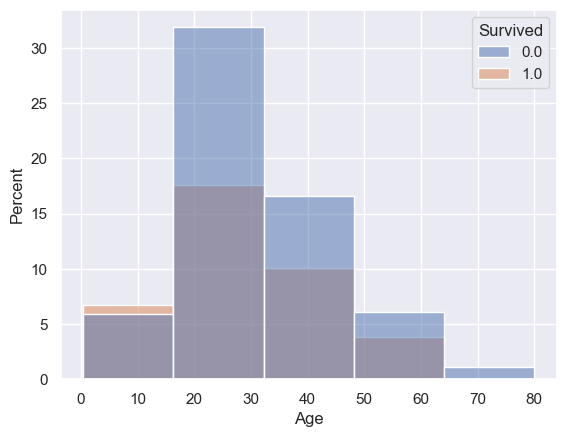

In [900]:
ax = sns.histplot(data=mf_train, x="Age", stat="percent", bins=5, hue="Survived")

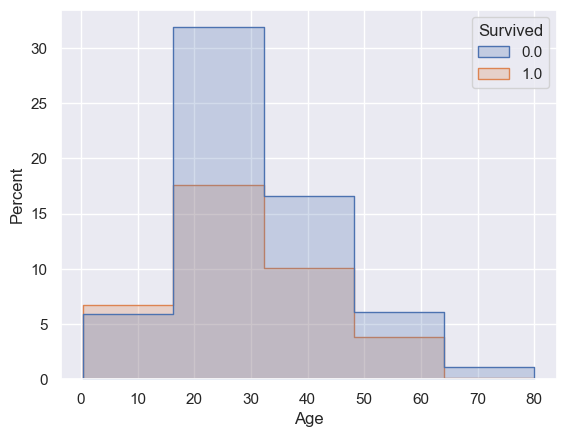

In [899]:
ax = sns.histplot(data=mf_train, x="Age", stat="percent", element="step", bins=5, hue="Survived")

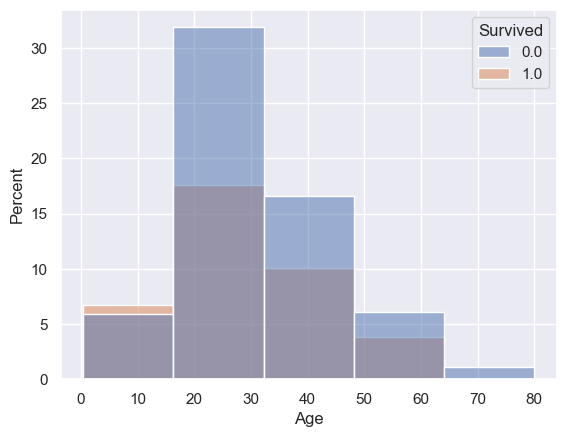

In [897]:
ax = sns.histplot(data=mf_train, x="Age", stat="percent", hue="Survived", bins=5)

NOTES: Age closely resembles a gaussian distribution, with a long right-tail. Over 50% are passengers are under the age of 30. Speaking to Age's relationship with survival, only under 16's chance of surviving was greater than that of not surviving. At the other under of the distribution, over 64's chance of surviving was very slim.

## SibSp

In [936]:
mf_train.query('SibSp > 0 ').shape[0]

283

In [901]:
mf_train.SibSp.value_counts()

0.0    608
1.0    209
2.0     28
4.0     18
3.0     16
8.0      7
5.0      5
Name: SibSp, dtype: int64

In [910]:
mf_train.query('SibSp == 8')

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Letter__C,Letter__D,Letter__E,Letter__F,Letter__G,Letter__None,Letter__T,Embarked__Q,Embarked__S,PassengerId
159,0.0,3.0,8.598967,8.0,2.0,69.55,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,160
180,0.0,3.0,16.625167,8.0,2.0,69.55,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,181
201,0.0,3.0,18.133000,8.0,2.0,69.55,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,202
324,0.0,3.0,18.133000,8.0,2.0,69.55,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,325
792,0.0,3.0,16.625167,8.0,2.0,69.55,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,793
846,0.0,3.0,18.133000,8.0,2.0,69.55,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,847
863,0.0,3.0,16.625167,8.0,2.0,69.55,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,864


NB: The number of SibSp does not mean all are listed in the train dataset.

In [904]:
SibSp_survived = mf_train.groupby('SibSp').Survived.value_counts().round(2)

In [906]:
SibSp_survived_normalized = mf_train.groupby('SibSp').Survived.value_counts(normalize=True).round(2)

In [967]:
SibSp_survived_combined = pd.concat([SibSp_survived,
                 SibSp_survived_normalized],
                 axis=1,
                 keys=('Count', 'Percentage')).round(2)


In [968]:
SibSp_survived_combined

Count  Percentage
    Survived                   
0.0 0.0       445.0        0.65
    1.0       233.0        0.35
1.0 1.0        65.0        0.54
    0.0        53.0        0.46
2.0 0.0        40.0        0.54
    1.0        40.0        0.46
3.0 1.0         3.0        0.25
    0.0         2.0        0.75
4.0 0.0         4.0        0.83
5.0 0.0         4.0        1.00
    1.0         1.0         NaN
6.0 0.0         1.0         NaN
4.0 1.0         NaN        0.17
8.0 0.0         NaN        1.00

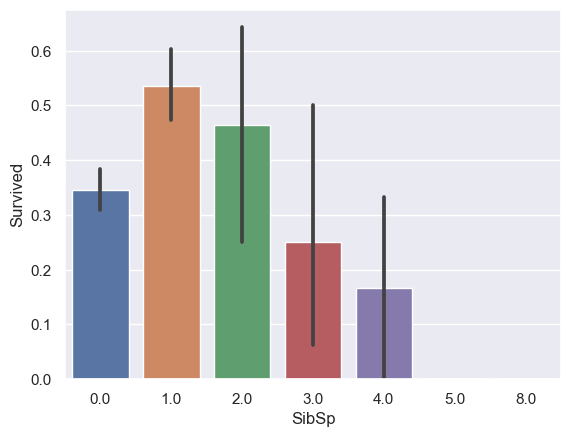

In [924]:
ax = sns.barplot(data=mf_train, x="SibSp", y="Survived")

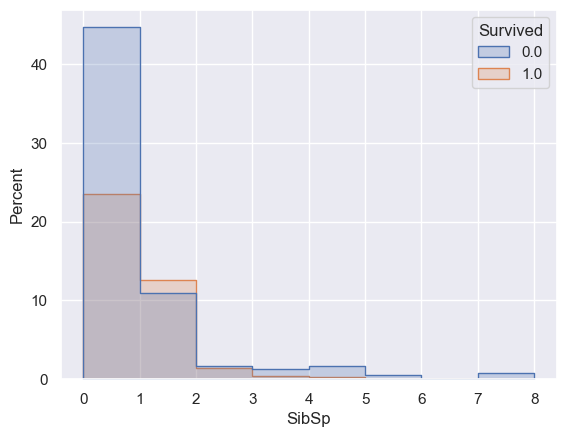

In [931]:
ax = sns.histplot(data=mf_train, x="SibSp", stat="percent", element="step", bins=8, hue="Survived")

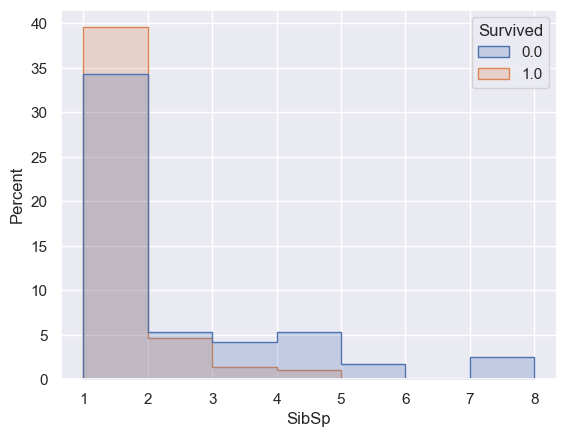

In [932]:
ax = sns.histplot(data=mf_train.query('SibSp > 0'), x="SibSp", stat="percent", element="step", bins=7, hue="Survived")

NOTES: Of 891 passengers, 283 have SibSp. Having 1 or 2 SibSp increase chance of survival of above average, compared to any other value which has a below average chance of survival. I imagine that this is accounted for by married couples or small families. Having 3 or more siblings dramatically decreases chances of survival. 

## Parch

In [937]:
mf_train.query('Parch > 0 ').shape[0]

213

In [935]:
mf_train.Parch.value_counts()

0.0    678
1.0    118
2.0     80
5.0      5
3.0      5
4.0      4
6.0      1
Name: Parch, dtype: int64

In [970]:
Parch_survived = mf_train.groupby('Parch').Survived.value_counts()

In [973]:
Parch_survived

Parch  Survived
0.0    0.0         445
       1.0         233
1.0    1.0          65
       0.0          53
2.0    0.0          40
       1.0          40
3.0    1.0           3
       0.0           2
4.0    0.0           4
5.0    0.0           4
       1.0           1
6.0    0.0           1
Name: Survived, dtype: int64

In [971]:
Parch_survived_normalized = mf_train.groupby('Parch').Survived.value_counts(normalize=True)

In [974]:
Parch_survived_normalized

Parch  Survived
0.0    0.0         0.656342
       1.0         0.343658
1.0    1.0         0.550847
       0.0         0.449153
2.0    0.0         0.500000
       1.0         0.500000
3.0    1.0         0.600000
       0.0         0.400000
4.0    0.0         1.000000
5.0    0.0         0.800000
       1.0         0.200000
6.0    0.0         1.000000
Name: Survived, dtype: float64

In [977]:
Parch_survived_combined = pd.concat([Parch_survived,
                 Parch_survived_normalized],
                 axis=1,
                 keys=('Count', 'Percentage')).round(2)

In [978]:
Parch_survived_combined

Count  Percentage
Parch Survived                   
0.0   0.0         445        0.66
      1.0         233        0.34
1.0   1.0          65        0.55
      0.0          53        0.45
2.0   0.0          40        0.50
      1.0          40        0.50
3.0   1.0           3        0.60
      0.0           2        0.40
4.0   0.0           4        1.00
5.0   0.0           4        0.80
      1.0           1        0.20
6.0   0.0           1        1.00

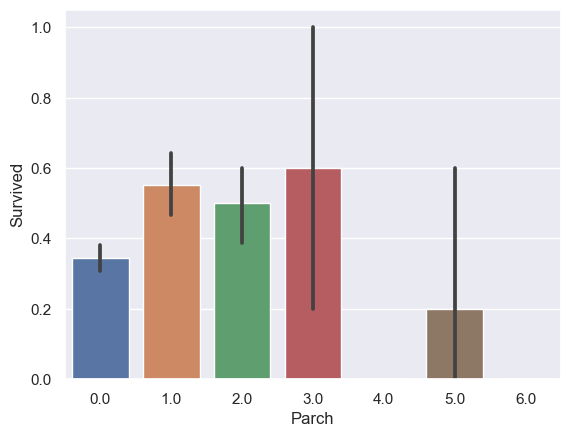

In [969]:
ax = sns.barplot(data=mf_train, x="Parch", y="Survived")

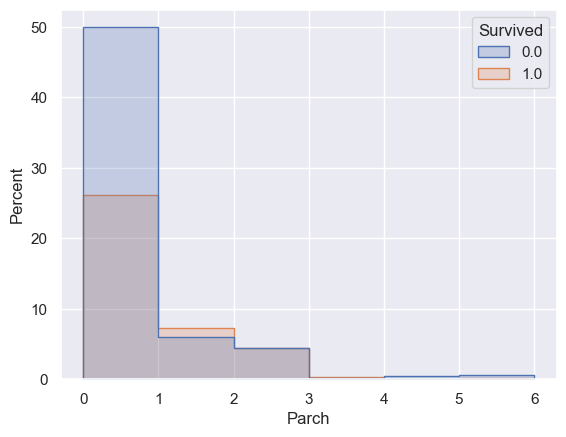

In [981]:
ax = sns.histplot(data=mf_train, x="Parch", stat="percent", element="step", bins=6, hue="Survived")

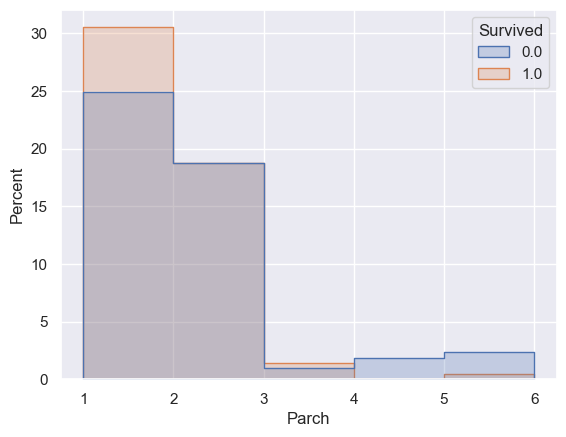

In [983]:
ax = sns.histplot(data=mf_train.query('Parch > 0'), x="Parch", stat="percent", element="step", bins=5, hue="Survived")

NOTES: Nearly 300 passengers, or 1/3 of the data, have Parch relations. Having 1, 2 or 3 Parch relation increase chance of survival of above average, compared to any other value which has a below average chance of survival. Greater than 3 Parch relationships greatly decreases chance of survival, where as having none means a little below average chance of survival.

## Fare

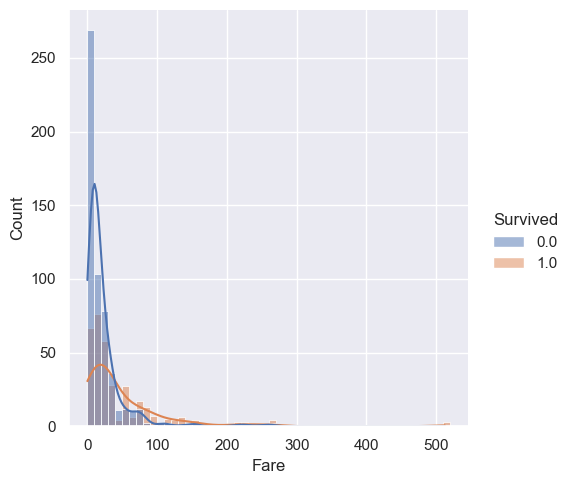

In [1000]:
ax = sns.displot(data=mf_train, x="Fare", hue="Survived", kde=True, binwidth=10)

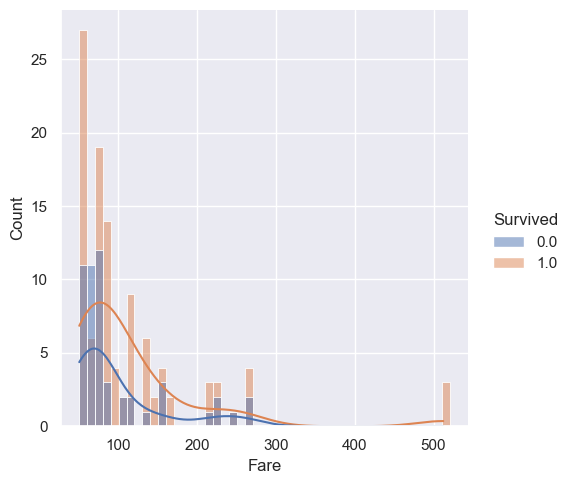

In [1001]:
ax = sns.displot(data=mf_train.query('Fare>50'), x="Fare", hue="Survived", kde=True, binwidth=10)

## Title

## Ticket

### Duplicate Ticket

### Ticket Length

## Cabin

### Duplicate Cabin

### Cabin Letter

## Embarked